# Advanced Audio Processing, Part 1: Acoustics and Sound Localization

This is a test notebook to check if your installation is working. Please execute the following cells and check if their are executing correctly. If not, please contact your teacher to try to debug your configuration before the first practical session.

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from client import array

c:\Users\hp\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


### When working with the acquisition system

In [ ]:
antenne=array('server')


### When working on recorded files

In [2]:
antenne=array('play')

### Get parameters and read data

In [11]:
Fs = antenne.fs
BLK = antenne.blocksize

d = antenne.interspace
# Read one buffer
m = antenne.read()

In [20]:
m = np.array(m)

m = m.sum(axis=1)

np.sqrt(np.mean(m**2))

3.3393595

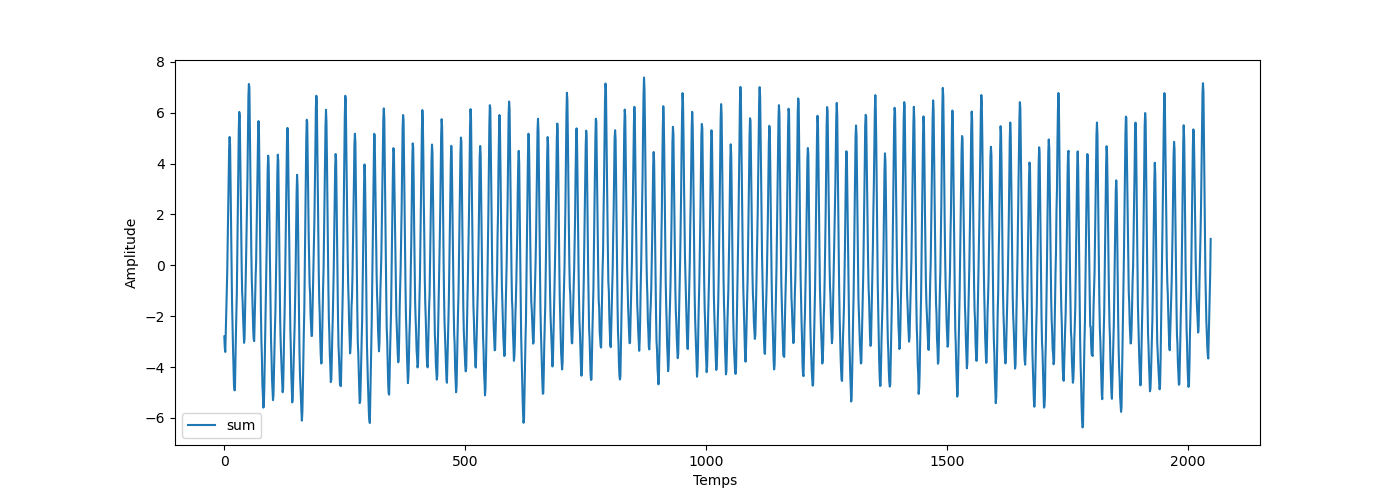

In [21]:
plt.figure(figsize=[14,5])
plt.plot(m,label="sum")
plt.xlabel('Temps ')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [4]:
np.sqrt(np.mean(m20[:,1]**2))

NameError: name 'm20' is not defined

In [136]:
d = [1,5,10,15,20]
rms = [15.094936, 3.8175795, 1.6184379, 0.9666157, 0.635142]

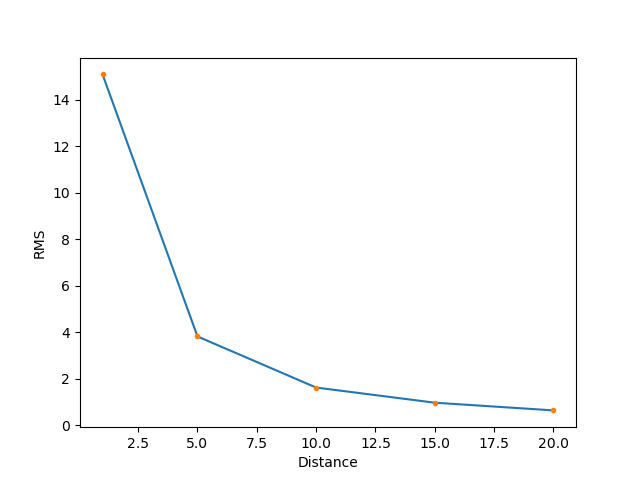

In [143]:
plt.figure()
plt.plot(d,rms,label="RMS")
plt.plot(d,rms,'.')
plt.xlabel('Distance')
plt.ylabel('RMS')

plt.show()

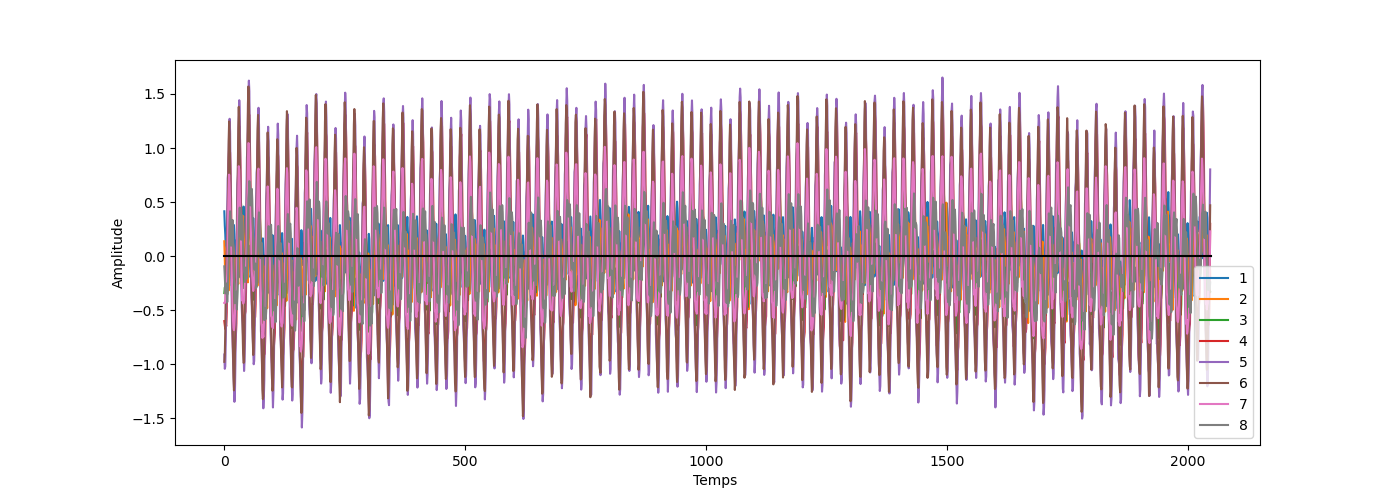

In [12]:
plt.figure(figsize=[14,5])
plt.plot(m,label=[1,2,3,4,5,6,7,8])
plt.plot([0,len(m[:,7])],[0,0],color="black")
plt.xlabel('Temps ')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [100]:
def FT(Y,N,fs):
    yf = np.fft.fft(Y)[:N//2]
    xf = np.fft.fftfreq(N, 1/fs)[:N//2]
    return yf,xf

In [107]:
N = 2048
Fy0 , Fx0 = FT(m[:,0],N,20000)
Fy7 , Fx7 = FT(m[:,7],N,20000)

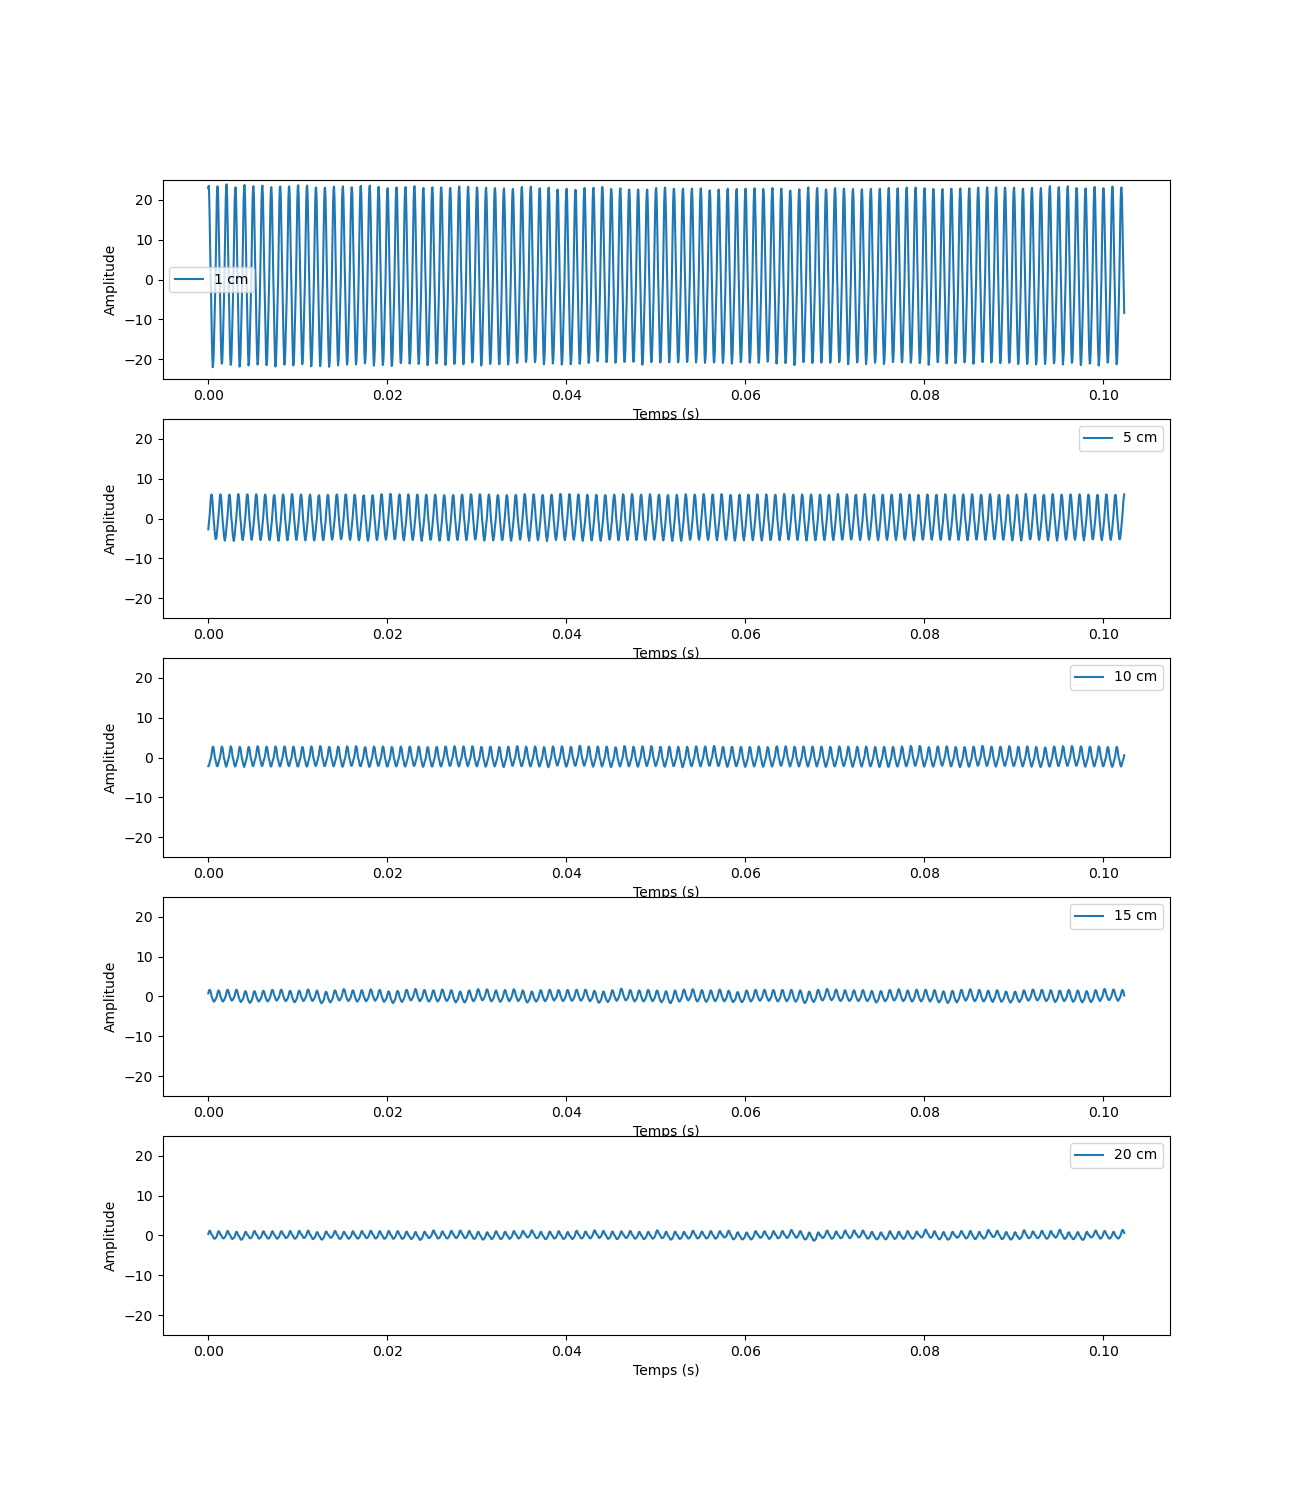

In [135]:
plt.figure(figsize=[13,15])

plt.subplot(5,1,1)
x = np.arange(len(m1))/20000

plt.plot(x,m1[:,1],label="1 cm")
plt.ylabel('Amplitude')
plt.xlabel('Temps (s)')
plt.ylim([-25,25])
plt.legend()

plt.subplot(5,1,2)

plt.plot(x,m5[:,1],label="5 cm")
plt.ylabel('Amplitude')
plt.xlabel('Temps (s)')
plt.ylim([-25,25])
plt.legend()


plt.subplot(5,1,3)

plt.plot(x,m10[:,1],label="10 cm")
plt.ylabel('Amplitude')
plt.xlabel('Temps (s)')
plt.ylim([-25,25])
plt.legend()

plt.subplot(5,1,4)

plt.plot(x,m15[:,1],label="15 cm")
plt.ylabel('Amplitude')
plt.xlabel('Temps (s)')
plt.ylim([-25,25])
plt.legend()

plt.subplot(5,1,5)

plt.plot(x,m20[:,1],label="20 cm")
plt.ylabel('Amplitude')
plt.xlabel('Temps (s)')
plt.ylim([-25,25])
plt.legend()


plt.show()

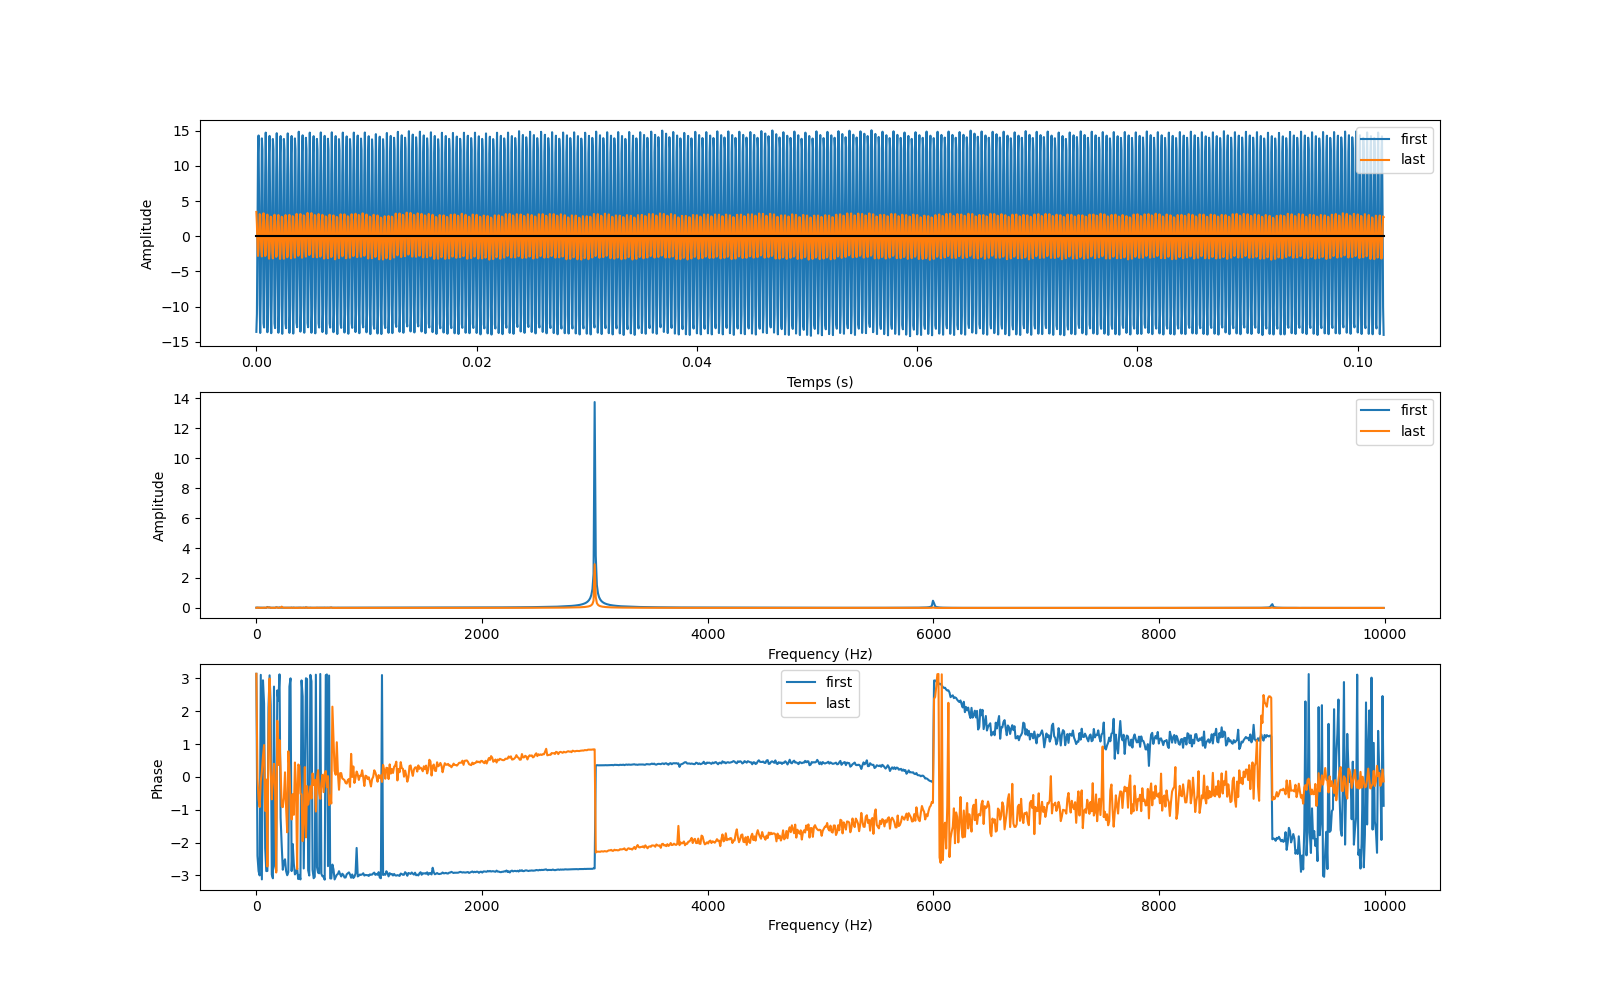

In [108]:
plt.figure(figsize=[16,10])

plt.subplot(3,1,1)
x = np.arange(len(m))/20000
plt.plot(x,m[:,[7,0]],label=["first",'last'])
plt.plot([0,x[-1]],[0,0],color="black")
plt.ylabel('Amplitude')
plt.xlabel('Temps (s)')
plt.legend()

plt.subplot(3,1,2)

plt.plot(Fx7,np.abs(Fy7)*2/N,label="first")
plt.plot(Fx0,np.abs(Fy0)*2/N,label="last")
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.legend()

plt.subplot(3,1,3)

plt.plot(Fx7,np.angle(Fy7),label="first")
plt.plot(Fx0,np.angle(Fy0),label="last")
plt.ylabel('Phase')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.legend()
plt.show()

In [103]:
Dphi = np.angle(Fy7) - np.angle(Fy0)

dphi = 0
for i, f in enumerate(Fx0) :
    if i == 0 :
        pass
    else :
        dphi += Dphi[i] / (2 * np.pi * f)

TDOA = dphi / len(Fx0)


In [104]:
(0.06)/TDOA

736.125025970941